In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# 用的数据是美国年度失业率
unemployment = pd.read_csv('unemployment.csv')

In [16]:
unemployment.head()

,year,rate
0,1955,4.383333
1,1956,4.141667
2,1957,4.258333
3,1958,6.800000
4,1959,5.475000


In [17]:
# 构建随机缺失值列
unemployment['missing'] = unemployment['rate']
# 随机的选择10%行手动填充缺失值
# random_state 相当于一个随机种子
mis_index = unemployment.sample(frac = 0.1, random_state = 99).index
unemployment.loc[mis_index, 'missing'] = None

In [18]:
unemployment

,year,rate,missing
0,1955,4.383333,4.383333
1,1956,4.141667,4.141667
2,1957,4.258333,4.258333
3,1958,6.800000,6.800000
4,1959,5.475000,5.475000
...,...,...,...
61,2016,4.866667,4.866667
62,2017,4.350000,4.350000
63,2018,3.900000,3.900000
64,2019,3.666667,3.666667


In [19]:
# 1.用forward fill填充
unemployment['f_fill'] = unemployment['missing']
# ffill为前向填充
unemployment['f_fill'].ffill(inplace = True)
unemployment

,year,rate,missing,f_fill
0,1955,4.383333,4.383333,4.383333
1,1956,4.141667,4.141667,4.141667
2,1957,4.258333,4.258333,4.258333
3,1958,6.800000,6.800000,6.800000
4,1959,5.475000,5.475000,5.475000
...,...,...,...,...
61,2016,4.866667,4.866667,4.866667
62,2017,4.350000,4.350000,4.350000
63,2018,3.900000,3.900000,3.900000
64,2019,3.666667,3.666667,3.666667


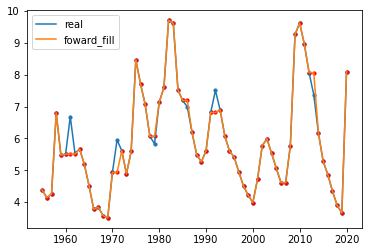

In [26]:
plt.scatter(unemployment.year,unemployment.rate,s = 10)
plt.plot(unemployment.year,unemployment.rate,label='real')
plt.scatter(unemployment.year, unemployment.f_fill, s = 10, c = 'r')
plt.plot(unemployment.year, unemployment.f_fill, label = 'foward_fill')
plt.legend()

In [27]:
# 2. Moving average
unemployment['missing'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
61    False
62    False
63    False
64    False
65    False
Name: missing, Length: 66, dtype: bool

In [28]:
unemployment['movevg'] = np.where(unemployment['missing'].isnull(), unemployment['missing'].shift(1).rolling(3, min_periods = 1).mean(),
                                unemployment['missing'])

In [29]:
unemployment

,year,rate,missing,f_fill,movevg
0,1955,4.383333,4.383333,4.383333,4.383333
1,1956,4.141667,4.141667,4.141667,4.141667
2,1957,4.258333,4.258333,4.258333,4.258333
3,1958,6.800000,6.800000,6.800000,6.800000
4,1959,5.475000,5.475000,5.475000,5.475000
...,...,...,...,...,...
61,2016,4.866667,4.866667,4.866667,4.866667
62,2017,4.350000,4.350000,4.350000,4.350000
63,2018,3.900000,3.900000,3.900000,3.900000
64,2019,3.666667,3.666667,3.666667,3.666667


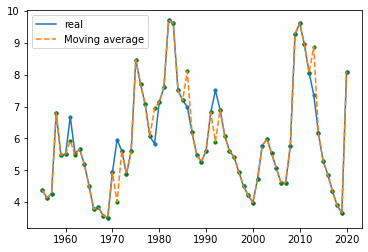

In [41]:
plt.scatter(unemployment.year,unemployment.rate,s = 10)
plt.plot(unemployment.year,unemployment.rate,label='real')

#plt.scatter(unemployment.year, unemployment.f_fill, s = 10, c = 'r')
#plt.plot(unemployment.year, unemployment.f_fill, label = 'foward_fill')
plt.scatter(unemployment.year, unemployment.movevg, s = 10, c = 'g')
plt.plot(unemployment.year, unemployment.movevg, label = 'Moving average', linestyle = '--')
plt.legend()

In [35]:
df = pd.DataFrame(np.random.randn(7, 4),
                  index = pd.date_range('1/1/2020', periods=7),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
2020-01-01,-0.703380,0.856629,0.354547,1.074601
2020-01-02,-0.586819,-1.231980,0.917543,1.965277
2020-01-03,-0.658068,-0.237568,-1.237230,1.088797
2020-01-04,-0.610575,0.642858,-0.527517,-0.865132
2020-01-05,-0.028274,-0.476931,0.745583,-1.093605
2020-01-06,-0.307915,0.961099,-0.617101,-0.987125
2020-01-07,-0.764673,0.011453,-0.706566,0.223511


In [40]:
df['D'].shift(1)

2020-01-01         NaN
2020-01-02    1.074601
2020-01-03    1.965277
2020-01-04    1.088797
2020-01-05   -0.865132
2020-01-06   -1.093605
2020-01-07   -0.987125
Freq: D, Name: D, dtype: float64

In [39]:
df['D'].shift(1).rolling(3, min_periods = 1).mean()

2020-01-01         NaN
2020-01-02    1.074601
2020-01-03    1.519939
2020-01-04    1.376225
2020-01-05    0.729647
2020-01-06   -0.289980
2020-01-07   -0.981954
Freq: D, Name: D, dtype: float64

In [37]:
df

,A,B,C,D
2020-01-01,-0.703380,0.856629,0.354547,1.074601
2020-01-02,-0.586819,-1.231980,0.917543,1.965277
2020-01-03,-0.658068,-0.237568,-1.237230,1.088797
2020-01-04,-0.610575,0.642858,-0.527517,-0.865132
2020-01-05,-0.028274,-0.476931,0.745583,-1.093605
2020-01-06,-0.307915,0.961099,-0.617101,-0.987125
2020-01-07,-0.764673,0.011453,-0.706566,0.223511


In [42]:
# 3. interpolation
# 尝试线性插值和多项式插值
unemployment['inter_line'] = unemployment['missing'].interpolate(method = 'linear')
unemployment['inter_poly'] = unemployment['missing'].interpolate(method = 'polynomial', order = 3)

In [43]:
unemployment

,year,rate,missing,f_fill,movevg,inter_line,inter_poly
0,1955,4.383333,4.383333,4.383333,4.383333,4.383333,4.383333
1,1956,4.141667,4.141667,4.141667,4.141667,4.141667,4.141667
2,1957,4.258333,4.258333,4.258333,4.258333,4.258333,4.258333
3,1958,6.800000,6.800000,6.800000,6.800000,6.800000,6.800000
4,1959,5.475000,5.475000,5.475000,5.475000,5.475000,5.475000
...,...,...,...,...,...,...,...
61,2016,4.866667,4.866667,4.866667,4.866667,4.866667,4.866667
62,2017,4.350000,4.350000,4.350000,4.350000,4.350000,4.350000
63,2018,3.900000,3.900000,3.900000,3.900000,3.900000,3.900000
64,2019,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667


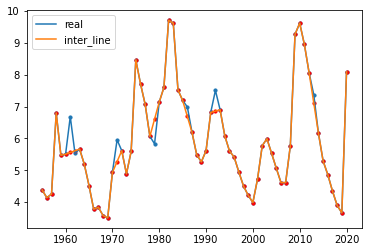

In [45]:
plt.scatter(unemployment.year,unemployment.rate,s = 10)
plt.plot(unemployment.year,unemployment.rate,label='real')

plt.scatter(unemployment.year, unemployment.inter_line, s = 10, c = 'r')
plt.plot(unemployment.year, unemployment.inter_line, label = 'inter_line')

#plt.scatter(unemployment.year, unemployment.inter_poly, s = 10, c = 'g')
#plt.plot(unemployment.year, unemployment.inter_poly, label = 'inter_poly', linestyle = '--')
plt.legend()

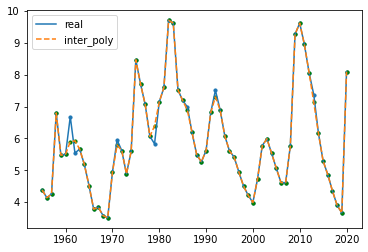

In [46]:
plt.scatter(unemployment.year,unemployment.rate,s = 10)
plt.plot(unemployment.year,unemployment.rate,label='real')
plt.scatter(unemployment.year, unemployment.inter_poly, s = 10, c = 'g')
plt.plot(unemployment.year, unemployment.inter_poly, label = 'inter_poly', linestyle = '--')
plt.legend()

In [47]:
# python实现指数平滑
air = pd.read_csv('air.csv')

In [48]:
air.head()

,Date,Passengers
0,1949/1,112
1,1949/2,118
2,1949/3,132
3,1949/4,129
4,1949/5,121


In [49]:
# 设置两种平滑系数
air['smooth_0.5'] = air.Passengers.ewm(alpha = 0.5).mean()
air['smooth_0.9'] = air.Passengers.ewm(alpha = 0.9).mean()

In [50]:
air

,Date,Passengers,smooth_0.5,smooth_0.9
0,1949/1,112,112.000000,112.000000
1,1949/2,118,116.000000,117.454545
2,1949/3,132,125.142857,130.558559
3,1949/4,129,127.200000,129.155716
4,1949/5,121,124.000000,121.815498
5,1949/6,135,129.587302,133.681562
6,1949/7,148,138.866142,146.568157
7,1949/8,148,143.450980,147.856816
8,1949/9,136,139.718200,137.185682
9,1949/10,119,129.348974,120.818568


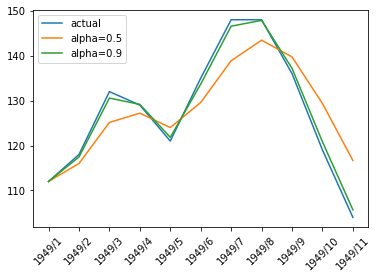

In [55]:
plt.plot(air.Date,air.Passengers,label = 'actual')
plt.plot(air.Date,air['smooth_0.5'],label = 'alpha=0.5')
plt.plot(air.Date,air['smooth_0.9'],label = 'alpha=0.9')
plt.xticks(rotation = 45)
plt.legend()